In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
import ast

## Image and ROIS

../data/processed/Train/images/1.png ../data/processed/Train/rois/1.png


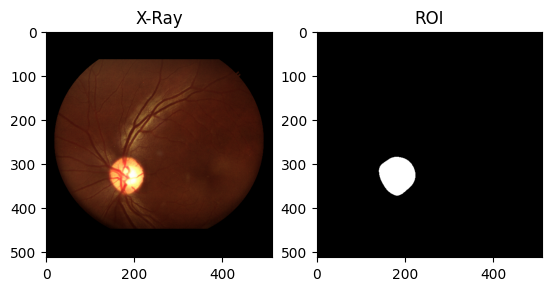

In [11]:
#Print image and roi
imgs_path = sorted(glob.glob("../data/processed/Train/images/*"))
rois_path = sorted(glob.glob("../data/processed/Train/rois/*"))
id_img = 0
print(imgs_path[id_img],rois_path[id_img])
plt.figure()
plt.subplot(1,2,1)
cxr = plt.imread(imgs_path[id_img])
plt.imshow(cxr,cmap="gray")
plt.title("X-Ray")
plt.subplot(1,2,2)
roi = plt.imread(rois_path[id_img])
plt.title("ROI")
plt.imshow(roi,cmap="gray")
plt.show()

## Labels

In [12]:
labels = pd.read_csv("../data/processed/Train/processed_labels.csv")
labels["Onehot"] = labels["Onehot"].apply(lambda x: ast.literal_eval(x))

In [13]:
lst_labels = []
for l in labels["Onehot"]:
    lst_labels.append(l)
np.sum(lst_labels,axis=0)

array([137])

In [14]:
sum(np.sum(lst_labels,axis=1) != 0)

137

In [15]:
len(lst_labels)

1008

In [16]:
labels[labels["ImageID"]=="20536686640136348236148679891455886468_k6ga29.png"]["Onehot"].sum() == 0

True

In [17]:
labels

,ImageID,PatientID,Camera,Onehot
0,Image101.JPG,Image101,Bosch,[1]
1,Image102.JPG,Image102,Bosch,[0]
2,Image103.JPG,Image103,Bosch,[0]
3,Image104.JPG,Image104,Bosch,[0]
4,Image105.JPG,Image105,Bosch,[0]
...,...,...,...,...
1003,IMG_3704.JPG,IMG_3704,Remidio,[0]
1004,IMG_3705.JPG,IMG_3705,Remidio,[0]
1005,IMG_3706.JPG,IMG_3706,Remidio,[0]
1006,IMG_3707.JPG,IMG_3707,Remidio,[0]


In [18]:
labels = pd.read_csv("../data/processed/Train/processed_labels.csv")
labels.groupby(["Camera","Onehot"]).count()

ImageID  PatientID
Camera  Onehot                    
Bosch   [0]          84         84
        [1]          19         19
Forus   [0]          79         79
        [1]          16         16
Remidio [0]         708        708
        [1]         102        102